In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np 

# Loading data

In [2]:
path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\labeled_climate_data.pkl"
df = pd.read_pickle(path)
df.shape

(481631, 122)

In [3]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)
df.shape

(475432, 122)

# Ecoregions

In [4]:
print("Level 1 groups:", df.Level_1.nunique())
print("Level 2 groups:", df.Level_2.nunique())
print("Level 3 groups:", df.Level_3.nunique())

Level 1 groups: 11
Level 2 groups: 21
Level 3 groups: 88


In [5]:
df.Level_1.value_counts(dropna=False)

Level_1
8  EASTERN TEMPERATE FORESTS          147881
9  GREAT PLAINS                       138042
10  NORTH AMERICAN DESERTS             84970
6  NORTHWESTERN FORESTED MOUNTAINS     53015
5  NORTHERN FORESTS                    24590
11  MEDITERRANEAN CALIFORNIA            9600
13  TEMPERATE SIERRAS                   6136
7  MARINE WEST COAST FOREST             5707
12  SOUTHERN SEMIARID HIGHLANDS         2435
0  WATER                                1885
15  TROPICAL WET FORESTS                1171
Name: count, dtype: int64

In [6]:
df.Level_2.value_counts(dropna=False)

Level_2
10.1  COLD DESERTS                                            61745
8.3  SOUTHEASTERN USA PLAINS                                  58405
9.4  SOUTH CENTRAL SEMIARID PRAIRIES                          57585
6.2  WESTERN CORDILLERA                                       53015
9.3  WEST-CENTRAL SEMIARID PRAIRIES                           39828
9.2  TEMPERATE PRAIRIES                                       33606
8.4  OZARK/OUACHITA-APPALACHIAN FORESTS                       30493
8.1  MIXED WOOD PLAINS                                        25556
10.2  WARM DESERTS                                            23225
8.5  MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL PLAINS    19435
5.2  MIXED WOOD SHIELD                                        14740
8.2  CENTRAL USA PLAINS                                       13992
5.3  ATLANTIC HIGHLANDS                                        9850
11.1  MEDITERRANEAN CALIFORNIA                                 9600
13.1  UPPER GILA MOUNTAINS              

In [7]:
df.Level_3.value_counts(dropna=False)

Level_3
9.3.3  Northwestern Great Plains         23766
10.1.5  Central Basin and Range          18702
8.3.5  Southeastern Plains               18264
9.4.1  High Plains                       16973
9.4.2  Central Great Plains              16157
                                         ...  
8.5.4  Atlantic Coastal Pine Barrens       854
8.4.6  Boston Mountains                    821
8.1.2  Lake Erie Lowland                    23
5.2.3  Algonquin/Southern Laurentians       14
10.1.1  Thompson-Okanogan Plateau            7
Name: count, Length: 88, dtype: int64

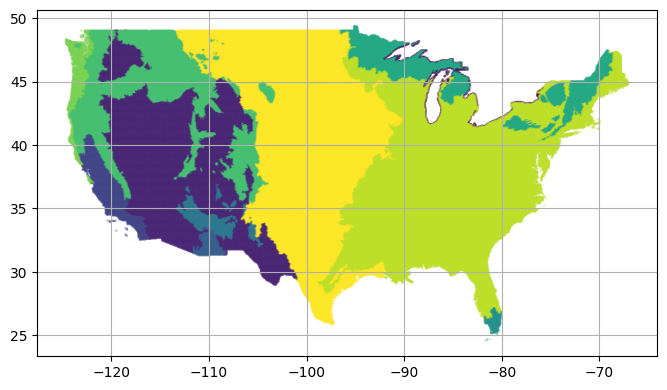

In [8]:
df["Level_1"] = df["Level_1"].astype("category")
colors = df["Level_1"].cat.codes
plt.figure(figsize=(8,4.5))
plt.scatter(df.longitude, df.latitude, c=colors, s=0.01)
plt.grid()
plt.show()

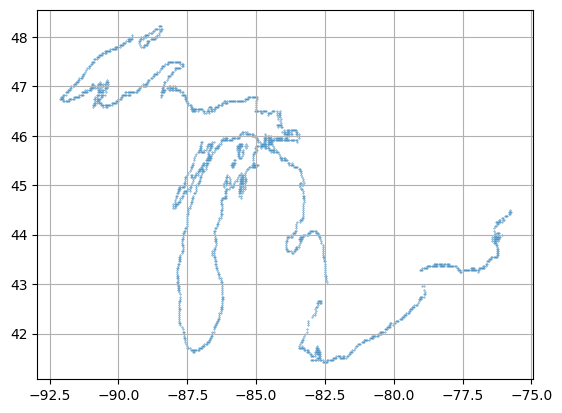

In [9]:
plt.scatter(df[df.Level_1 == "0  WATER"].longitude, df[df.Level_1 == "0  WATER"].latitude, s=0.1)
plt.grid()
plt.show()

In [10]:
df = pd.DataFrame(df[df.Level_1 != "0  WATER"])
df.reset_index(drop=True, inplace=True)
df.shape

(473547, 122)

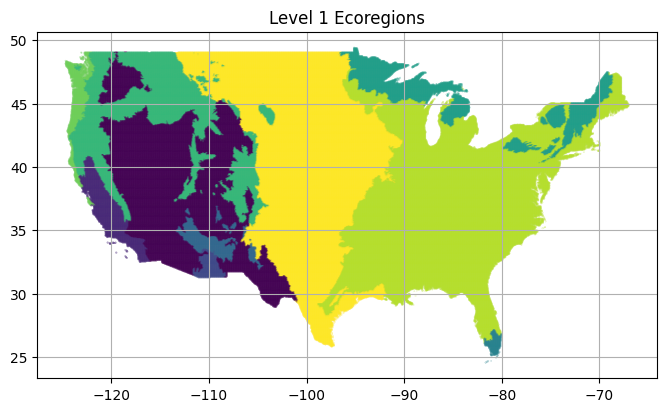

In [11]:
df["Level_1"] = df["Level_1"].astype("category")
colors = df["Level_1"].cat.codes
plt.figure(figsize=(8,4.5))
plt.scatter(df.longitude, df.latitude, c=colors, s=0.01)
plt.title('Level 1 Ecoregions')
plt.grid()
plt.show()

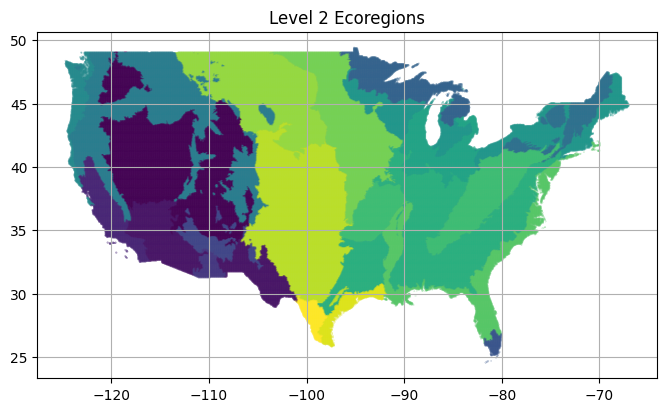

In [12]:
df["Level_2"] = df["Level_2"].astype("category")
colors = df["Level_2"].cat.codes
plt.figure(figsize=(8,4.5))
plt.scatter(df.longitude, df.latitude, c=colors, s=0.01)
plt.title('Level 2 Ecoregions')
plt.grid()
plt.show()

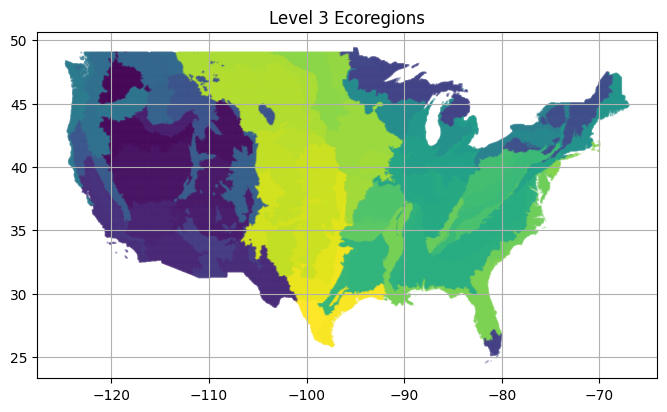

In [13]:
df["Level_3"] = df["Level_3"].astype("category")
colors = df["Level_3"].cat.codes
plt.figure(figsize=(8,4.5))
plt.scatter(df.longitude, df.latitude, c=colors, s=0.01)
plt.title('Level 3 Ecoregions')
plt.grid()
plt.show()

In [14]:
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Climate 

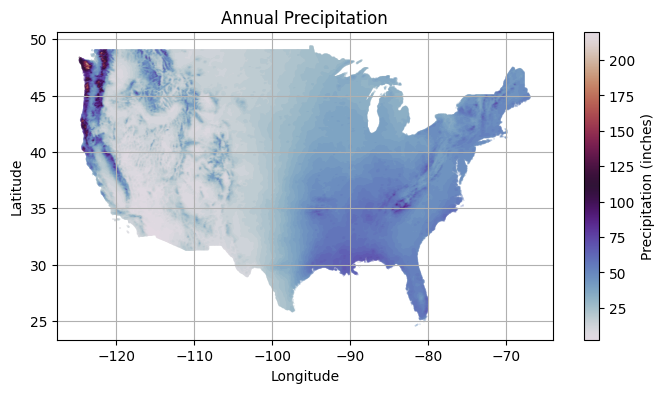

In [15]:
plt.figure(figsize=(8,4))
sc = plt.scatter(
    df["longitude"], 
    df["latitude"], 
    c=np.round((df["annual_precip"]/25.5) / 2.5) * 2.5, 
    cmap="twilight", 
    s=0.01,
    alpha=1)

plt.colorbar(sc, label="Precipitation (inches)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Annual Precipitation")
plt.grid(True)
plt.show()

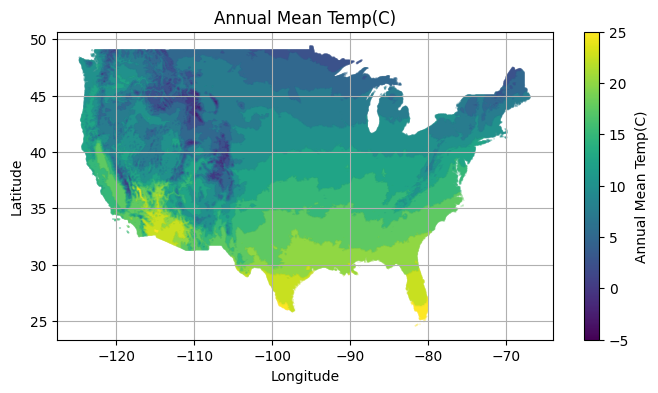

In [16]:
plt.figure(figsize=(8,4))
sc = plt.scatter(
    df["longitude"], 
    df["latitude"], 
    c=np.round(df["annual_meant"] / 2.5) * 2.5, 
    cmap="viridis", 
    s=0.01,
    alpha=1)

plt.colorbar(sc, label="Annual Mean Temp(C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Annual Mean Temp(C)")
plt.grid(True)
plt.show()

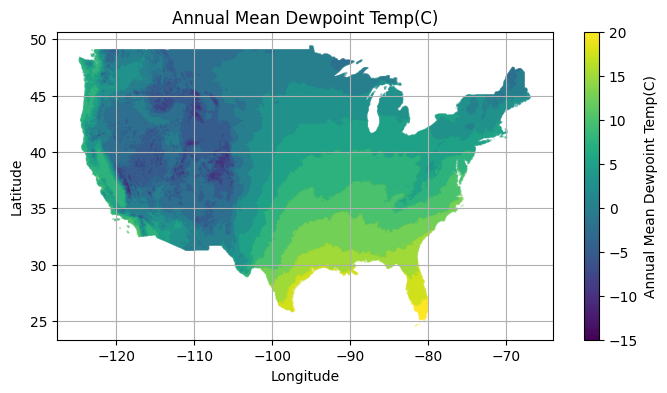

In [17]:
plt.figure(figsize=(8,4))
sc = plt.scatter(
    df["longitude"], 
    df["latitude"], 
    c=np.round(df["annual_dptmean"] / 2.5) * 2.5, 
    cmap="viridis", 
    s=0.01,
    alpha=1)

plt.colorbar(sc, label="Annual Mean Dewpoint Temp(C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Annual Mean Dewpoint Temp(C)")
plt.grid(True)
plt.show()

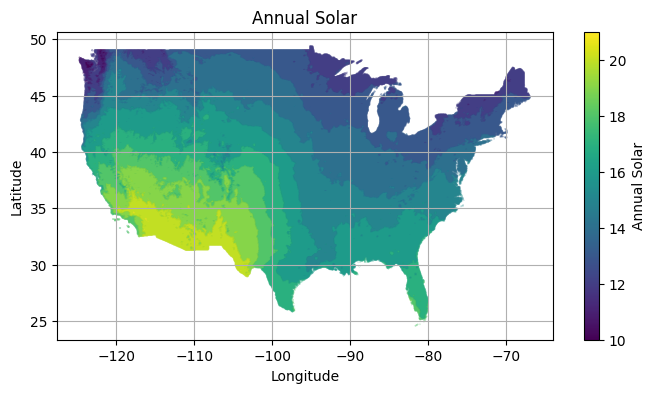

In [18]:
plt.figure(figsize=(8,4))
sc = plt.scatter(
    df["longitude"], 
    df["latitude"], 
    c=np.round(df["annual_solar"]), 
    cmap="viridis", 
    s=0.01,
    alpha=1)

plt.colorbar(sc, label="Annual Solar")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Annual Solar")
plt.grid(True)
plt.show()